Basic Machine Learning Project

Authors: Oscar Gamarra; Manuel Ayllon

In [6]:
# Write down importations and functions you need
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
# Load the data:
df_train = pd.read_csv('train_2024.csv')
df_test = pd.read_csv('test_2024.csv') # to be used at the very end

# Have a taste of each dataset:
print(df_train.describe())
df_train.head()
# One can see already that the data is imbalanced (look at Gene 1 and compare it with Gene 4 or 1994)

            Gene 1       Gene 2       Gene 3        Gene 4       Gene 5  \
count  3270.000000  3283.000000  3254.000000   3265.000000  3271.000000   
mean      4.042508   107.950350    99.852182  14294.332925   363.525527   
std       1.134445    30.155826    27.919364   3676.872584   101.116939   
min       0.000000    10.000000     0.000000   3066.000000     0.000000   
25%       3.000000    88.000000    81.000000  11719.000000   299.000000   
50%       4.000000   108.000000    99.000000  14191.000000   362.000000   
75%       5.000000   128.000000   118.000000  16760.000000   431.000000   
max       8.000000   214.000000   188.000000  29735.000000   702.000000   

            Gene 6       Gene 7       Gene 8       Gene 9      Gene 10  ...  \
count  3281.000000  3262.000000  3260.000000  3279.000000  3275.000000  ...   
mean    308.295337   394.595953  2606.179141  2378.703568    55.540763  ...   
std      70.352693   113.025895   642.554410   736.571718    16.513441  ...   
min     

,Gene 1,Gene 2,Gene 3,Gene 4,Gene 5,Gene 6,Gene 7,Gene 8,Gene 9,Gene 10,...,Gene 1993,Gene 1994,Gene 1995,Gene 1996,Gene 1997,Gene 1998,Gene 1999,Gene 2000,Outcome,Id
0,4.0,107.0,135.0,15752.0,459.0,189.0,222.0,2258.0,2992.0,77.0,...,156.0,18368.0,318.0,89.0,307.0,82.0,227.0,302.0,3,3328
1,4.0,96.0,130.0,13704.0,486.0,244.0,298.0,NaN,1874.0,50.0,...,82.0,21033.0,375.0,NaN,426.0,91.0,232.0,116.0,1,2085
2,5.0,139.0,71.0,13866.0,326.0,418.0,402.0,2833.0,1821.0,64.0,...,122.0,13853.0,244.0,114.0,273.0,87.0,219.0,NaN,3,2455
3,3.0,135.0,47.0,14945.0,432.0,239.0,224.0,3020.0,2958.0,69.0,...,50.0,16328.0,289.0,NaN,NaN,98.0,244.0,312.0,3,2457
4,2.0,69.0,48.0,8758.0,337.0,214.0,358.0,NaN,3388.0,80.0,...,119.0,10714.0,557.0,99.0,206.0,107.0,136.0,364.0,1,3641


**EXERCISE 1**

Do some exploratory data analysis. Don’t just look globally, also look at (some of) these metrics by class. There might be differences, after all:  
- How many missing data are there?  
- Are there other strange values in the data?  
- What is the proportion of classes in your data?  
- How many genes (features) have entirely equal measured expression values as other genes (i.e. are there duplicate columns in the data)?  
- What is the maximum value in the data, and the minimum?  
- Which feature has the highest variance?  
- Finally, make a boxplot of the expression values of the 30 features with the highest variance in the dataset, ordered by this variance.

Missing data check:
Gene 1       250
Gene 2       237
Gene 3       266
Gene 4       255
Gene 5       249
            ... 
Gene 1998    259
Gene 1999    252
Gene 2000    236
Outcome        0
Id             0
Length: 2002, dtype: int64

Data Types check:
Gene 1       float64
Gene 2       float64
Gene 3       float64
Gene 4       float64
Gene 5       float64
              ...   
Gene 1998    float64
Gene 1999    float64
Gene 2000    float64
Outcome        int64
Id             int64
Length: 2002, dtype: object
Class Proportions:
Number of Duplicate Gene Expression: 0
Maximum Value: 51663.0   |   Minimum Value: 0.0
Gene with the Highest Variance: Gene 1127
Displaying Boxplot of the Top 30 Genes with highest variance


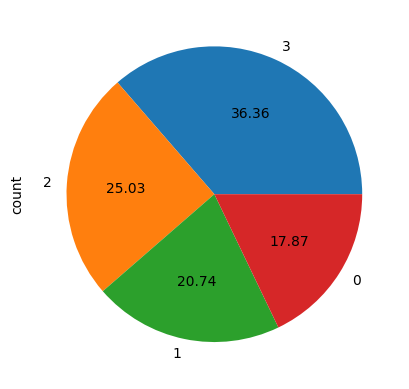

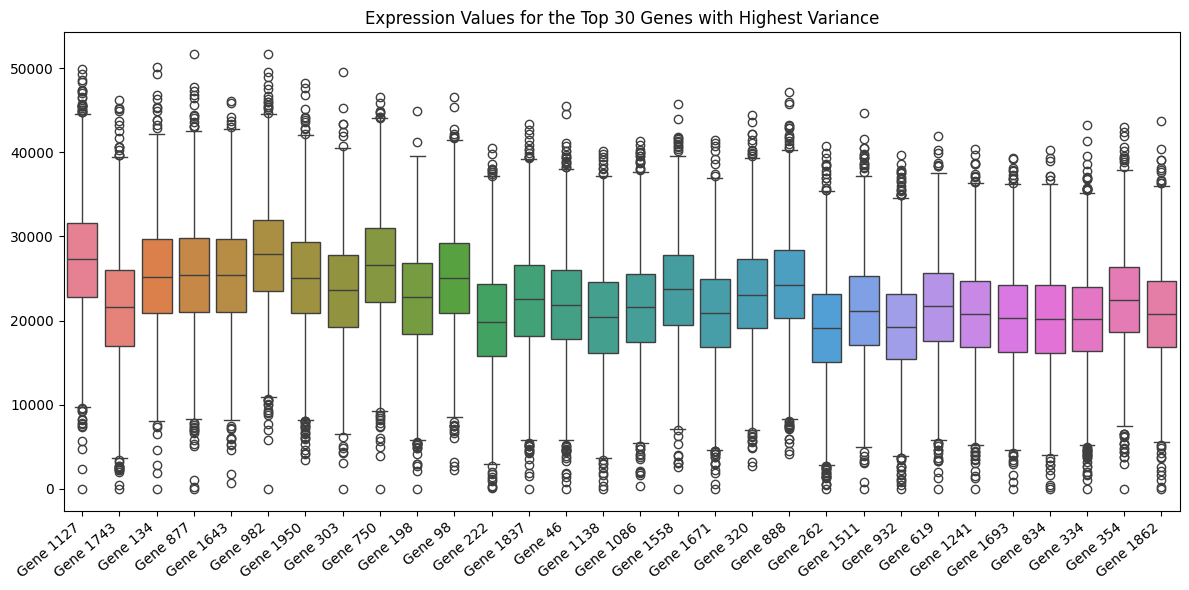

In [8]:
df_train_features = df_train.drop(['Id','Outcome'], axis=1)
# -------------------------------------------------------------------------------------
print("Missing data check:")
print(df_train.isnull().sum())
# -------------------------------------------------------------------------------------
print("\nData Types check:")
print(df_train.dtypes)
# -------------------------------------------------------------------------------------
print("Class Proportions:")
df_train['Outcome'].value_counts().plot.pie(autopct='%.2f')
# -------------------------------------------------------------------------------------
num_duplicate_columns = df_train.columns.duplicated().sum()
print("Number of Duplicate Gene Expression:", num_duplicate_columns)
# -------------------------------------------------------------------------------------
max_value = df_train_features.max().max()
min_value = df_train_features.min().min()
print("Maximum Value:", max_value, '  |  ' ,'Minimum Value:', min_value )
# -------------------------------------------------------------------------------------
variances = df_train_features.var()
gene_with_highest_variance = variances.idxmax()
print("Gene with the Highest Variance:", gene_with_highest_variance)
# -------------------------------------------------------------------------------------
print('Displaying Boxplot of the Top 30 Genes with highest variance')
# Calculate variance for each Gene (Feature), and sort them from higher to lower
variances_sorted = variances.sort_values(ascending=False)
# Select the top 30 features and create a dataframe with them
top30 = variances_sorted[:30].index.tolist()
top30_df = df_train_features[top30]
# Making the boxplot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=top30_df)
ax.set_xticks(range(len(top30)))
ax.set_xticklabels(top30, rotation=40, ha="right")
ax.set_title('Expression Values for the Top 30 Genes with Highest Variance')
plt.tight_layout()
plt.show()
# -------------------------------------------------------------------------------------

Conclusions from **EXERCISE 1**
- The number of missing data (NaNs) is significant across all genes. Therefore it is necessary to deal with them (next step)
- No duplicates were found between features, meaning that there are no genes with identical profile expression.
- No strange values were found, all reads are complete. Datatypes look elocuent.
- There is a clear imbalance between different classes as it can be seen in the class proportions (piechart). This must be corrected since each class must be input into the model under equal conditions (equal number of sample for each class), so the cancer subtype can be predicted more accurately.
- Gene expression values range from 0 to 51663. The variance of each gene between samples was measured and the top 30 genes with highest variance were plot in a Boxplot.

**EXERCISE 2**
Big surprise: there’s missing data. Before you deal with that, take care of the class 
imbalance problem in the brute-force way described above: downsample the data so 
that you have equal numbers of data for each class. Continue with that training data to the following steps.

Outcome
0    629
1    629
2    629
3    629
Name: count, dtype: int64
Checking new data:
      Gene 1  Gene 2  Gene 3   Gene 4  Gene 5  Gene 6  Gene 7  Gene 8  Gene 9  \
7        NaN    93.0   116.0  17932.0   409.0   249.0   278.0  2953.0  2021.0   
11       4.0    99.0    84.0  15956.0   452.0   296.0   407.0  3167.0  2169.0   
12       5.0   118.0   120.0  20132.0   538.0   405.0   290.0  2813.0  1739.0   
15       5.0    79.0    82.0  11633.0   608.0   231.0   519.0  1756.0  1209.0   
17       5.0   125.0    54.0      NaN   313.0   276.0   369.0  2088.0  2759.0   
1608     5.0    92.0    81.0      NaN   448.0     NaN     NaN     NaN     NaN   
3154     3.0    91.0    95.0  13039.0     NaN   317.0   507.0  3987.0  1645.0   
1069     3.0   124.0    70.0   6426.0   299.0   347.0   560.0  2538.0  1802.0   
376      6.0   151.0    51.0   6610.0   224.0   193.0   319.0     NaN  2330.0   
3196     4.0    77.0    93.0  14576.0   281.0   232.0   376.0  2910.0  2387.0   

      Gene 10  ... 

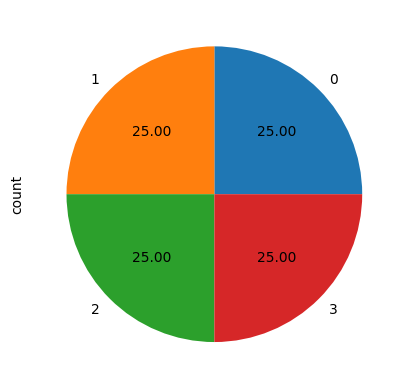

In [9]:
# Since imabalance in data is found more often than not in ML, there are different ways to adress it.
# Here we are going to apply a data level approach called 'downsampling' in order to have equal numbers of data for each class.
# To do as the exercise orders, we are going to take advantage of the amazing 'imbalance learn' library to downsample the more dense classes.
type0data = df_train[df_train["Outcome"] == 0]
type1data = df_train[df_train["Outcome"] == 1]
type2data = df_train[df_train["Outcome"] == 2]
type3data = df_train[df_train["Outcome"] == 3]

type1dataDownsampled = type1data.sample(n=629, random_state = 1)
type2dataDownsampled = type2data.sample(n=629, random_state = 1)
type3dataDownsampled = type3data.sample(n=629, random_state = 1)

frames = [type0data,type1dataDownsampled,type2dataDownsampled,type3dataDownsampled]
balanced_df_train = pd.concat(frames)

balanced_df_train['Outcome'].value_counts().plot.pie(autopct='%.2f')
print(balanced_df_train["Outcome"].value_counts())

print ("Checking new data:")
print(balanced_df_train.iloc[np.r_[0:5, -5:0]])

Conclusions from **EXERCISE 2**
- Dataset is now balanced, containing equal number of samples per class.
- There are [other ways to perform downsampling](https://towardsdatascience.com/how-to-deal-with-imbalanced-multiclass-datasets-in-python-fe0bb3f2b669), but some of them cannot work with NaNs. Therefore, since we had to wait for the next exercise to deal with them, we could not use them.

**EXERCISE 3**
Make a Pipeline that combines three steps:  
- Imputing missing data (removing np.nan) by replacing them with the mean value 
(SimpleImputer) 
- Scaling the data to have 0 mean and unit variance (StandardScaler) 
- Predicting the class using unregularized logistic regression (sklearn.linear_model LogisticRegression) 
Now, split the training data into 20% validation and 80% train data. 
Fit the Pipeline on the train data and test on the validation data.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import f1_score

# Split the data into features (X) and target (y), and into train and validation sets
X = balanced_df_train.drop(["Id", "Outcome"], axis=1)  # Features
y = balanced_df_train['Outcome']  # Target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the pipeline
logisticReg_pipes = Pipeline([
    ("simpleImputer", SimpleImputer(missing_values=np.nan, strategy='mean')), 
    ("scaler", StandardScaler()), 
    ("regressor", LogisticRegression(penalty='none'))])

# Start with the training
logisticReg_pipes.fit(X_train, y_train)

# Make the predictions
y_pred = logisticReg_pipes.predict(X_val)

print("Macro F1 score on validation data:")
print(f1_score(y_val, y_pred, average='macro'))

macro_roc_auc_ovr = roc_auc_score(y_val, logisticReg_pipes.predict_proba(X_val), average="macro", multi_class='ovr')
print(f"ROC AUC one-versus-rest score: {macro_roc_auc_ovr:.3f}")

print("Classification report: ")
print(classification_report(y_val, y_pred, target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']))

# Lets plot ROC AUC curves one-vs-rest
y_score = logisticReg_pipes.predict_proba(X_val)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_val)

colors = cycle(["red", "cornflowerblue", "forestgreen", "magenta"])
n_classes = y_onehot_test.shape[1]

fig, ax = plt.subplots(figsize=(6, 6))

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score[:, class_id],
        name=f"ROC curve for class {class_id}",
        color=color,
        ax=ax,
    )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves in One-vs-Rest')
plt.legend(loc="lower right")
plt.show()

Conclusions from **EXERCISE 3**
- A ROC AUC one-versus-rest score of 0.839 was obtained (quite good).
- The performance of the model is evaluated by the area under the curve (AUC) across all possible classification thresholds. Basically, it can be interpreted as the probability that the model ranks a random positive example more highly than a random negative example. It goes from 0 to 1, being 0.5 the value for a random classifier.
- A Macro F1 score of 0.5968307651494109 was obtained. This score integrates precision and recall into a single metric in order to have more information about the model performance. One can measure model performance with accuracy in this case, because the dataset is balanced. If it would not be balanced, F1 score comes to rescue, measuring false positives and false negatives, and not just the number of predictions that were wrong.
- Scaling and inputing the whole training set (including the validation set) leads to leaking of information between datasets, so when we perform the above mentioned analysis, the resulting scores would be unrealistically good.

**EXERCISE 4**

Again, make a Pipeline that combines three steps: 
- scaling each value to 0 mean and unit variance 
- using a KNN imputer to impute missing data (removing np.nan). Set n_neighbors to  3 and weights to ‘distance’. Make sure you understand what this does. 
- it should again use a logistic regression without regularisation to predict the class. 

Train on the same 80% split, and report the performance on the validation data (F1 
macro; ROC AUC OvR). Then finally train on all your training data, and predict on 
the test set.  

/home/manuelayllon2000/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Macro F1 score on validation data:
0.5969181748439986
ROC AUC one-versus-rest score: 0.850
Classification report: 
              precision    recall  f1-score   support

     Class 0       0.57      0.64      0.60       127
     Class 1       0.60      0.56      0.58       124
     Class 2       0.66      0.56      0.60       138
     Class 3       0.57      0.63      0.60       115

    accuracy                           0.60       504
   macro avg       0.60      0.60      0.60       504
weighted avg       0.60      0.60      0.60       504



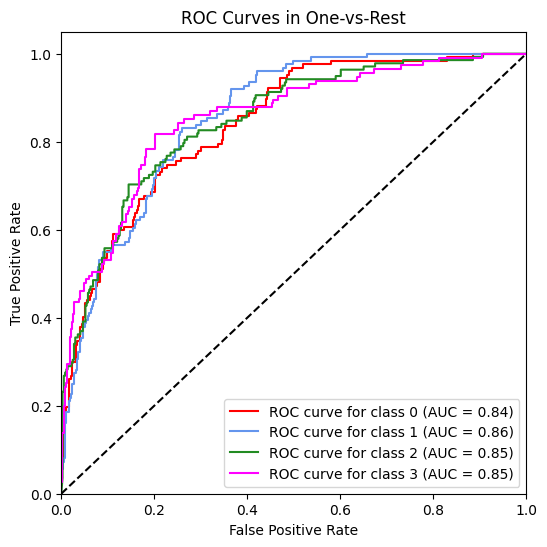

In [47]:
from sklearn.impute import KNNImputer

# Building the new pipeline
logisticReg_pipes_KNN = Pipeline([
    ("scaler", StandardScaler()), 
    ("KNNImputer", KNNImputer(missing_values=np.nan, n_neighbors = 3, weights = 'distance')), 
    ("regressor", LogisticRegression(penalty='none'))])

# Start with the training (same splits sets)
logisticReg_pipes_KNN.fit(X_train, y_train)

# Make the predictions
predictions_logisticReg_pipes_KNN = logisticReg_pipes_KNN.predict(X_val)

# Assess the model performance
f1_score_macro = f1_score(y_val, predictions_logisticReg_pipes_KNN, average='macro')
print(f"Macro F1 score on validation data: {f1_score_macro:.3f}")

macro_roc_auc_ovr = roc_auc_score(y_val, logisticReg_pipes_KNN.predict_proba(X_val), average="macro", multi_class='ovr')
print(f"ROC AUC one-versus-rest score: {macro_roc_auc_ovr:.3f}")

print("Classification report: ")
print(classification_report(y_val, predictions_logisticReg_pipes_KNN, target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3']))

# Lets plot ROC AUC curves one-vs-rest
y_score_KNN = logisticReg_pipes_KNN.predict_proba(X_val)
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_val)

colors = cycle(["red", "cornflowerblue", "forestgreen", "magenta"])
n_classes = y_onehot_test.shape[1]

fig, ax = plt.subplots(figsize=(6, 6))

for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_score_KNN[:, class_id],
        name=f"ROC curve for class {class_id}",
        color=color,
        ax=ax,
    )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves in One-vs-Rest')
plt.legend(loc="lower right")
plt.show()

# ----------------------------------------------------------------------------------------------------
# Let`s test the model
# ----------------------------------------------------------------------------------------------------

# Get the features from test set
X_test = df_test.drop(['Id'], axis = 1)
# Predict on test features
tested_logisticReg_pipes_KNN = logisticReg_pipes_KNN.predict(X_test)

# Once we have our prediction, let`s build a .csv file with the Id and the corresponding output
output_df = pd.DataFrame()
output_df["Id"] = df_test["Id"].tolist() # Get only the Id column
output_df["Outcome"] = tested_logisticReg_pipes_KNN.tolist()
output_df.to_csv("LogisticReg_Results.csv", index=False)

Conclusions from **EXERCISE 4**
- Imputation by KNN results in slighly better model performance.
- Scaling before imputation ensures that the distances or similarities calculated during imputation are consistent with the scaled data, so it might be prefereable when the imputation method relies on distances or similarity measures between data points.

**EXERCISE 5**
This data has many dimensions. You are hence probably overfitting. Let’s not do that. One simple way to combat overfitting a bit is by regularisation. 
- Regularise using an L2 penalty with a C of one (note that C is 1 / lambda).  
- Change the imputation step back to a SimpleImputer (KNN takes a long time, as you 
may have noticed). 
- Switch from using one split into 80% train and 20% validation to using 10-fold cross-validation. Use sklearn.model_selection.cross_validate, and look at F1 macro and ROC AUC OvR averaged over the folds.

In [49]:
from sklearn.model_selection import cross_validate

X = balanced_df_train.drop(["Id", "Outcome"], axis=1)  # Features
y = balanced_df_train['Outcome']  # Target

# Build the new pipeline
regularised_LogReg_pipes = Pipeline([
    ("scaler", StandardScaler()),
    ("simpleImputer", SimpleImputer(missing_values=np.nan, strategy='mean')),
    ("regressor", LogisticRegression(penalty='l2', C=1.0))
])

# perform cross validation
cv_regularised_LogReg = cross_validate(regularised_LogReg_pipes, X, y, cv = 10, scoring = ('f1_macro', 'roc_auc_ovr'), return_train_score = True)
print(f'Macro F1 score: {cv_regularised_LogReg["test_f1_macro"].mean()}')
print(f'ROC AUC score OvR averaged over all folds: {cv_regularised_LogReg["test_roc_auc_ovr"].mean()}')

Macro F1 score: 0.6438197429613515
ROC AUC score OvR averaged over all folds: 0.8616180083466546


Conclusions from **EXERCISE 5**
- Macro F1 and ROC AUC OvR scores are better when performing regularization which means that the logistic regression model is doing better:

Unregularised LogReg scores:
    - Macro F1 score on validatiomn fold: 0.597
    - ROC AUC OvR score on validation fold: 0.850

Regularised LogReg scores:
    - Macro F1 score averaged over all folds: 0.6296989086208027
    - ROC AUC score OvR averaged over all folds: 0.8599797192829189

**EXERCISE 6**
Do a PCA on your (normalised, imputed) training data (all of it, not within a Pipeline) 
and make a plot of the first 2 PCs. Colour the points by the class labels. How much 
variance is on the first and second component? Which single feature contributes the 
most to each PC?  

In [ ]:
from sklearn.decomposition import PCA

X = balanced_df_train.drop(["Id", "Outcome"], axis=1)  # Features
y = balanced_df_train['Outcome']  # Target

# Build the new pipeline this time only to normalise and input the train data
PCA_pipeline = Pipeline([ 
    ("scaler", StandardScaler()),
    ("simpleImputer", SimpleImputer(missing_values=np.nan, strategy='mean'))])

PCA_data = PCA_pipeline.fit_transform(X)

# Fit PCA to the data
pca = PCA(n_components=2)  # Extracting the first two principal components
X_pca = pca.fit_transform(PCA_data)

# Plot the transformed data with color-coded class labels
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'y']
for i, color in zip(range(4), colors):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, label=f'Class {i}')

plt.title('Plot of the First Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Calculate the variance explained by the first and second principal components
variance_explained = pca.explained_variance_ratio_
print("Variance explained by PC1:", variance_explained[0])
print("Variance explained by PC2:", variance_explained[1])

# Identify which single feature contributes the most to each PC
first_pc_loading = np.abs(pca.components_[0])
second_pc_loading = np.abs(pca.components_[1])

# Identify the index of the feature contributing the most to each PC
most_important_feature_pc1 = np.argmax(first_pc_loading)
most_important_feature_pc2 = np.argmax(second_pc_loading)

print("Most important feature contributing to PC1:", X.columns[most_important_feature_pc1])
print("Most important feature contributing to PC2:", X.columns[most_important_feature_pc2])

Conclusions from **EXERCISE 6**
- PC1 contributes more to explaining the variance that PC2.
- The most important feature contributing to PC1 is Gene 1569.
- The most important feature contributing to PC2 is Gene 1945.

**EXERCISE 7**
For the next part, let’s use PCA in your prediction Pipeline. Insert a PCA step where 
you think it fits and use 100 principal components. Keep the regularisation in your 
logistic regression. 

In [68]:
X = balanced_df_train.drop(["Id", "Outcome"], axis=1)  # Features
y = balanced_df_train['Outcome']  # Target

PCA_pipes = Pipeline([
    ("scaler", StandardScaler()),  # Step 1: Scale each value to 0 mean and unit variance
    ("simpleImputer", SimpleImputer(missing_values=np.nan, strategy='mean')),  # Step 2: Impute missing data using KNN imputer
    ("pca", PCA(n_components=100)),  # Step 3: PCA with 95% variance explained
    ("regressor", LogisticRegression(penalty='l2', C=1.0))  # Step 4: Logistic regression with L2 regularization and C=1.0
])

# perform cross validation
cv_regularised_PCA = cross_validate(PCA_pipes, X, y, cv = 10, scoring = ('f1_macro', 'roc_auc_ovr'), return_train_score = True)
print(f'Macro F1 score: {cv_regularised_PCA["test_f1_macro"].mean()}')
print(f'ROC AUC score OvR averaged over all folds: {cv_regularised_PCA["test_roc_auc_ovr"].mean()}')

# ----------------------------------------------------------------------------------------------------
# Let`s test the model
# ----------------------------------------------------------------------------------------------------

# Get the features from test set
X_test = df_test.drop(['Id'], axis = 1)
# Predict on test features
PCA_pipes.fit(X, y)
tested_PCA_pipes = PCA_pipes.predict(X_test)

# Once we have our prediction, let`s build a .csv file with the Id and the corresponding output
output_df = pd.DataFrame()
output_df["Id"] = df_test["Id"].tolist() # Get only the Id column
output_df["Outcome"] = tested_PCA_pipes.tolist()
output_df.to_csv("PCA_Results.csv", index=False)

Macro F1 score: 0.666710854398936
ROC AUC score OvR averaged over all folds: 0.878963737006873


Conclusions from **EXERCISE 7**

Performing a PCA improves Macro F1 Score and ROC AUC OvR score:

    Regularised LogReg scores:
    - Macro F1 score averaged over all folds: 0.6296989086208027
    - ROC AUC score OvR averaged over all folds: 0.8599797192829189

    PCA Regularised LogReg scores:
    - Macro F1 score averaged over all folds: 0.6634596507539287.
    - ROC AUC score OvR averaged over all folds: 0.8779921443059713

**EXERCISE 8**

There’s two things left to do: using nested cross-validation for hyperparameter 
optimalisation, and training some different classifiers. Let’s focus on nested cross-
validation first. 
- Do a RandomizedSearchCV over n_components for the PCA [50, 100, 200, 500] and C for the logistic regression [0.01, 0.1, 1, 10, 100]. Use an outer_cv of 10, and an inner_cv of 5. 
- Train a classifier on all the train data using the best hyperparameters (take the 
average of the ones used in the outer folds), and make your predictions on the test set.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X = balanced_df_train.drop(["Id", "Outcome"], axis=1)  # Features
y = balanced_df_train['Outcome']  # Target

# Define the hyperparameter grid for RandomizedSearchCV
hyperparam_grid = {
    'pca__n_components': [50, 100, 200, 500],
    'regressor__C': [0.01, 0.1, 1, 10, 100]
}

# Define the outer and inner cross-validation strategies
outer_cv = KFold(n_splits=10, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=PCA_pipes,
                                   param_distributions=hyperparam_grid,
                                   cv=inner_cv)

# Perform nested cross-validation
nested_test_score = cross_validate(random_search, X, y, cv = outer_cv, 
                            scoring = ('f1_macro', 'roc_auc_ovr'), return_estimator = True)

print(f'Macro F1 score: {nested_test_score["test_f1_macro"].mean()}')
print(f'ROC AUC score OvR averaged over all folds: {nested_test_score["test_roc_auc_ovr"].mean()}')

#---------------------------------------------------------------------------------------------------------------------
# rain a classifier on all the train data using the best hyperparameters and make predictions on the test set
#---------------------------------------------------------------------------------------------------------------------

# Fit RandomizedSearchCV to the entire training data
random_search.fit(X, y)

# Extract best hyperparameters
best_params = random_search.best_params_
best_pca_n_components = best_params['pca__n_components']
best_regressor_C = best_params['regressor__C']

# Train a new classifier on all the training data using the best hyperparameters
best_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=best_pca_n_components)),
    ("regressor", LogisticRegression(penalty='l2', C=best_regressor_C))
])
best_pipeline.fit(X, y)

# Make predictions on the test set
y_pred = best_pipeline.predict(X_test)

# Save the predictions in the .csv file
output_df = pd.DataFrame()
output_df["Id"] = df_test["Id"].tolist()
output_df["Outcome"] = y_pred
output_df.to_csv("Optimal_predictions.csv", index=False)

/home/manuelayllon2000/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/manuelayllon2000/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Conclusions from **EXERCISE 8**

The average score over outer folds are:
- Macro F1 score: 0.674494679050944
- ROC AUC score OvR averaged over all folds: 0.8885204679965538

While in PCA Regularised Logistic Regression, the scores are:
- Macro F1 score averaged over all folds: 0.6634596507539287.
- ROC AUC score OvR averaged over all folds: 0.8779921443059713

One can observe than performing nested cross validation improves model performance.

**EXERCISE 9**

***RANDOM FOREST***

Macro F1 score: 0.660808534217572
ROC AUC score OvR averaged over all folds: 0.8828688246850367
[ 408 1798 1882  381 1523] [0.00212925 0.00252176 0.0021339  0.00291067 0.00235318]


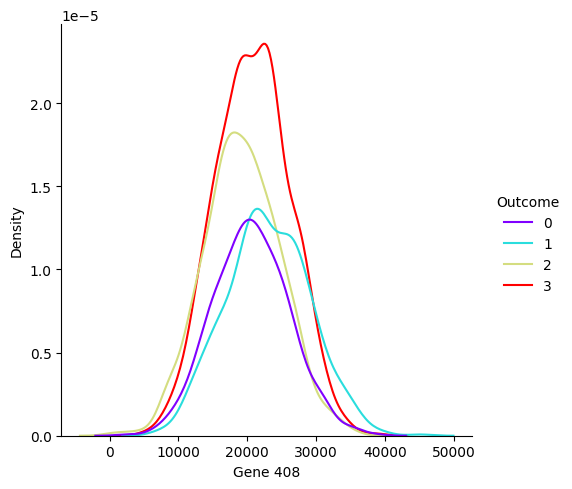

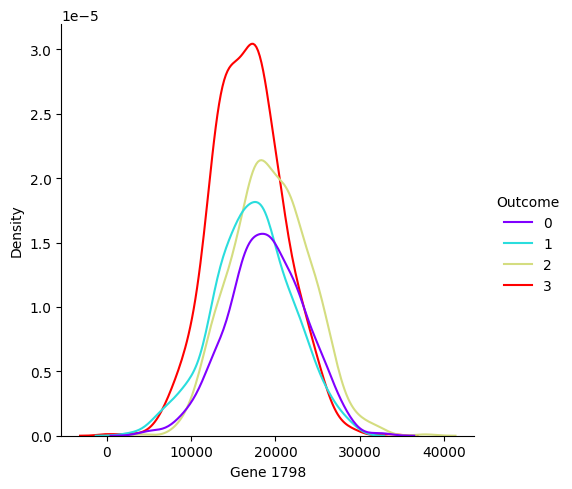

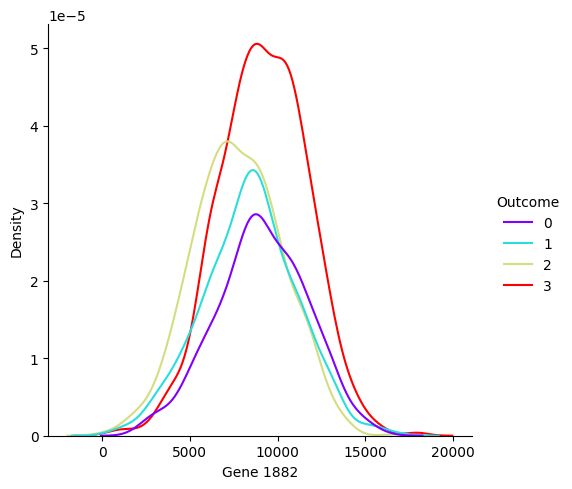

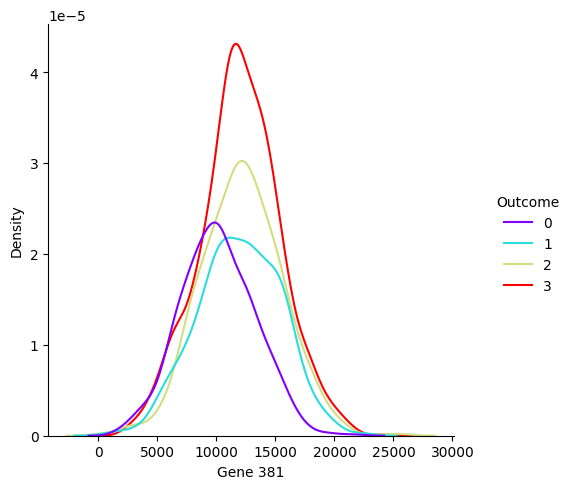

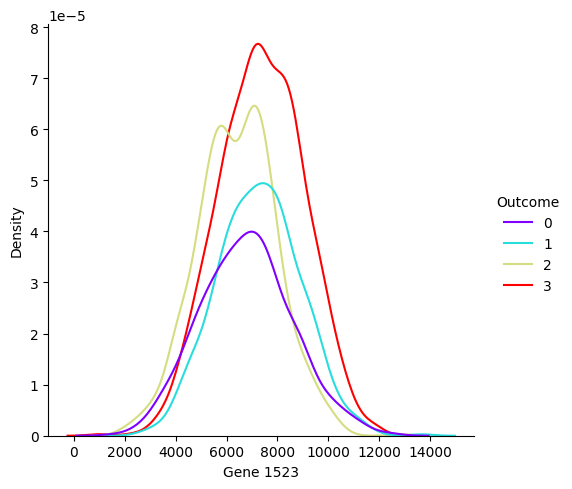

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline for Random Forest classifier
RF_pipes = Pipeline([
    ("simpleImputer", SimpleImputer(missing_values=np.nan, strategy='mean')),  # Impute missing values with mean
    ("randomForest", RandomForestClassifier(n_estimators=250))  # Random Forest classifier with 250 estimators
])

# Perform cross-validation with Random Forest pipeline
cv_RF = cross_validate(RF_pipes, X, y, cv=10, scoring=('f1_macro', 'roc_auc_ovr'), 
                       return_train_score=True, return_estimator=True)

# Print mean macro F1 score
print(f'Macro F1 score: {nested_test_score["test_f1_macro"].mean()}')

# Print mean ROC AUC score for one-vs-rest classification
print(f'ROC AUC score OvR averaged over all folds: {nested_test_score["test_roc_auc_ovr"].mean()}')

# Create a pipeline for Random Forest classifier for predictions
pipeRF_predictions = Pipeline([
    ("simpleImputer", SimpleImputer(missing_values=np.nan, strategy='mean')),  # Impute missing values with mean
    ("randomForest", RandomForestClassifier(n_estimators=250))  # Random Forest classifier with 250 estimators
])

# Fit the Random Forest pipeline to the entire dataset
pipeRF_predictions.fit(X, y)

# Get feature importances from the trained Random Forest classifier
importances = pipeRF_predictions["randomForest"].feature_importances_

# Calculate the maximum feature importance
importances.max()

# Get indices of top 5 features with highest importances
ind = np.argpartition(importances, -5)[-5:]

# Extract top 5 feature importances
top5 = importances[ind]

# Print indices and corresponding top 5 feature importances
print(ind+1, top5)

# Generate KDE plots for top 5 features
for i in ind:
    sns.displot(data=df_train, x=f'Gene {i+1}', hue="Outcome", kind="kde", palette='rainbow')

In [15]:
# Just like before, save the predictions in a .csv file

real_pipeRF_predictions = pipeRF_predictions.predict(X_test)

output_df = pd.DataFrame()
output_df["Id"] = df_test["Id"].tolist()
output_df["Outcome"] = real_pipeRF_predictions.tolist()
output_df.to_csv("RF_predictions.csv", index=False)

**EXERCISE 10**

***NEURAL NETWORKS (MEGAMIND)***

***authors note: We have tried many many times in many different ways to install tensorFlow and Keras, but all my tries were unsuccessful. Time is limited, life is short, and we could not show the output of the script. Anyways, here you have it, it might work, it might not, but there it is.***

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define the function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

NNmodel = KerasClassifier(build_fn=create_model, verbose=0)

X = balanced_df_train.drop(["Id", "Outcome"], axis=1)  # Features
y = balanced_df_train['Outcome']  # Target

# Define the pipeline
pipeline_NN = Pipeline([
    ('simpleImputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler()),  # Standardize features by removing the mean and scaling to unit variance
    ('PCA', PCA(n_components=10)),  # Apply PCA for dimensionality reduction
    ('NNmodel', NNmodel)  # Keras neural network model
])

# Perform cross-validation
scores = cross_val_score(pipeline_NN, X, y, cv=5, scoring='accuracy')

# Print the mean and standard deviation of the accuracy scores
print("Mean Accuracy:", np.mean(scores))
print(f"Standard Deviation of Accuracy: {np.std(scores)}")